---
title: "3.2-k-Nearest Neighbour (k-NN)"
author: "Ahmed Aredah"
date: "10.25.2023"
output: html_document
editor: visual
categories:
    Classification
    
---

## Overview

The k-Nearest Neighbour (k-NN) algorithm is a simple, intuitive method used for classification and regression tasks. Unlike model-based algorithms, it doesn't explicitly learn a model. Instead, it memorizes the training dataset and makes predictions by finding the 'k' training examples closest to a given input.

## Mathematical Description

Given a new observation $\mathbf{x}_0$, the k-NN algorithm identifies 'k' points from the training dataset that are closest to $\mathbf{x}_0$. For classification, the mode (most frequent class) among these k points is taken as the predicted class for $\mathbf{x}_0$. For regression, the average (or median) output value of these k points is used as the prediction.

The distance between two points can be computed using various metrics, with the Euclidean distance being the most common:

\begin{equation}
d(\mathbf{x}_i, \mathbf{x}_j) = \sqrt{\sum_{l=1}^{n} (x_{il} - x_{jl})^2}
\end{equation}

where:

-   $\mathbf{x}_i$ and $\mathbf{x}_j$ are two points in n-dimensional space.
-   $d(\mathbf{x}_i, $\mathbf{x}_j$)$ is the Euclidean distance between $\mathbf{x}_i$ and $\mathbf{x}_j$.

### Weighted k-NN

A variation of k-NN is the weighted k-NN, where weights are assigned to the k neighbours based on their distance to the query point. Closer neighbors will have a larger influence on the prediction than farther ones. The weights are typically computed using the inverse of the distance:

\begin{equation}
w_i = \frac{1}{d(\mathbf{x}_0, \mathbf{x}_i)^2}
\end{equation}


## Application on the Breast Cancer Wisconsin Dataset
We will be using the same dataset we used before in the LogisticRegression. By comparing the results from both logistic regression and k-NN, we can evaluate the strengths and weaknesses of each approach and determine which is more suitable for this particular dataset. 

In [1]:
#import required libraries
import pandas as pd
import os
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


#inline plots
%matplotlib inline

# Set Seaborn style to "whitegrid" for a white background with grid lines
sns.set_style("whitegrid")

#supress warnings!
warnings.simplefilter(action='ignore', category=Warning)
# Set the display option to show all columns
pd.set_option('display.max_columns', None)

print("required libraries loaded successfully!")

required libraries loaded successfully!


In [2]:
#| echo: false
# Set the background color to black and axis label color to white
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = 'black'
plt.rcParams['axes.edgecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['legend.facecolor'] = 'white'
plt.rcParams['legend.edgecolor'] = 'white'

In [3]:
# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

# Convert the data to a pandas DataFrame
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)

# Print the cross-validation scores
print("Cross-validation scores:", cv_scores)

# Print the average cross-validation score
print("Average cross-validation score:", cv_scores.mean())

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Cross-validation scores: [0.93406593 0.9010989  0.95604396 0.9010989  0.92307692]
Average cross-validation score: 0.9230769230769231
Accuracy: 0.956140350877193


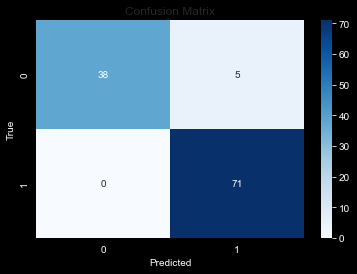

In [5]:
# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

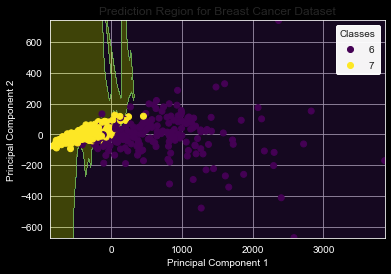

In [6]:
# Reduce the dimensionality of the dataset to 2 dimensions using PCA so we can visualize it
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Initialize the classifier
clf = KNeighborsClassifier(n_neighbors=5)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Create a meshgrid for the plot
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 1))

# Get the predictions for each point in the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the prediction region
plt.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')

# Plot the data points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y+6, cmap='viridis')

# Add a legend
legend = plt.legend(*scatter.legend_elements(), title='Classes')
plt.gca().add_artist(legend)

# Show the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Prediction Region for Breast Cancer Dataset')
plt.show()